In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm # 폰트 설정
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp # 음수 설정
mlp.rcParams["axes.unicode_minus"] = False

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [11]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [12]:
data = pd.read_csv("data/Pre_Charging.csv")
data

C:\Users\mhpark\AppData\Local\Temp\ipykernel_87920\254030363.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Pre_Charging.csv")


,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시작시각,충전종료시각,충전시간,실충전시간,미사용시간,충전시작시간,시구분
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,2022-01-01 09:51:51,2022-01-01 10:31:51,0.67,0.35,0.32,9,울산광역시
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,2022-01-01 10:33:43,2022-01-01 11:13:43,0.67,0.24,0.43,10,울산광역시
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,2022-01-01 18:38:26,2022-01-01 18:59:43,0.35,0.18,0.17,18,경기도
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,2022-01-01 19:10:29,2022-01-01 21:05:43,1.92,1.00,0.92,19,경기도
4,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,43.01,2022-01-01 12:37:45,2022-01-01 13:35:12,0.95,0.86,0.09,12,경기도
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790514,더샵스타시티 아파트,1921,서울특별시 광진구 자양동 아차산로 262,완속,7.0,5.11,2022-03-30 20:44:55,2022-03-30 22:15:04,1.50,0.73,0.77,20,서울특별시
790515,공지천 공영주차장,5928,강원도 춘천시 영서로 2438,급속,50.0,37.64,2022-03-30 21:15:44,2022-03-30 22:15:52,1.00,0.75,0.25,21,강원도
790516,가재마을3단지,4499,세종특별자치시 도움3로 159,완속,7.0,33.12,2022-03-30 17:03:42,2022-03-30 22:25:05,5.35,4.73,0.62,17,세종특별자치시
790517,강원도개발공사,9433,강원도 춘천시 외솔길 17,급속,50.0,40.42,2022-03-30 15:19:39,2022-03-30 16:19:45,1.00,0.81,0.19,15,강원도


In [13]:
# 전체, 급속, 완속 시간별 충전량 그래프
data1 = data[data['충전기구분'].str.contains("급속", na=False, case=False)]
data2 = data[data['충전기구분'].str.contains("완속", na=False, case=False)]

a = data["충전량"].groupby(data['충전시작시간']).sum() # 전체
b = data1["충전량"].groupby(data1['충전시작시간']).sum() # 급속
c = data2["충전량"].groupby(data2['충전시작시간']).sum() # 완속

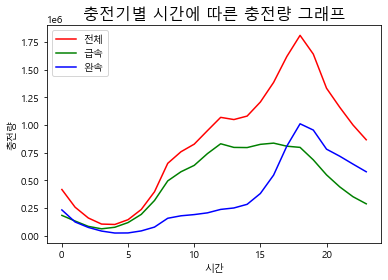

In [14]:
fig = plt.figure(figsize=(6,4))
axes = fig.add_subplot(111)

plt.plot(a, 'r', label="전체")
plt.plot(b, 'g', label="급속")
plt.plot(c, 'b', label="완속")

axes.set_xlabel("시간")
axes.set_ylabel("충전량")

plt.title('충전기별 시간에 따른 충전량 그래프', fontsize=16)
plt.legend()
plt.show()

In [21]:
data1 = pd.read_csv("data/Si_consolidation.csv",index_col=0)
data1

,충전량,충전시간,미사용시간,총충전횟수,충전횟수순위,충전소수,전기차등록대수
시구분,,,,,,,
강원도,26.92,1.94,0.53,42571,11.0,3377,8652
경기도,24.64,3.16,1.04,186966,16.0,23717,45891
경상남도,26.05,2.39,0.77,52588,12.0,5707,14371
경상북도,26.92,2.37,0.95,40389,10.0,5921,12318
광주광역시,27.49,2.65,0.73,17907,3.0,3176,6015
대구광역시,27.01,3.20,1.16,58638,14.0,6170,17584
대전광역시,27.22,2.68,0.73,35752,7.0,2670,8595
부산광역시,25.06,2.21,0.77,36862,9.0,5224,15330
서울특별시,24.25,2.58,0.86,137278,15.0,17076,43206


In [22]:
data1 = data1.drop(["충전량","충전시간","미사용시간","총충전횟수","충전횟수순위"], axis=1)
data1

,충전소수,전기차등록대수
시구분,,
강원도,3377,8652
경기도,23717,45891
경상남도,5707,14371
경상북도,5921,12318
광주광역시,3176,6015
대구광역시,6170,17584
대전광역시,2670,8595
부산광역시,5224,15330
서울특별시,17076,43206


In [23]:
data1["충전소점유율"] = ((data1["충전소수"]/data1["전기차등록대수"])*100).round(2)
data1

,충전소수,전기차등록대수,충전소점유율
시구분,,,
강원도,3377,8652,39.03
경기도,23717,45891,51.68
경상남도,5707,14371,39.71
경상북도,5921,12318,48.07
광주광역시,3176,6015,52.80
대구광역시,6170,17584,35.09
대전광역시,2670,8595,31.06
부산광역시,5224,15330,34.08
서울특별시,17076,43206,39.52


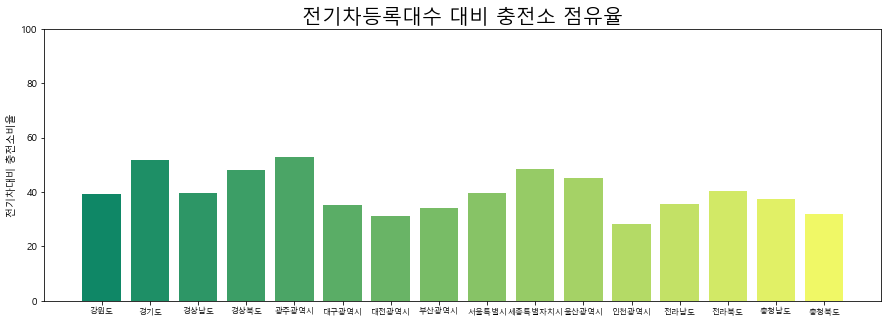

In [29]:
fig=plt.figure(figsize=(15,5))
fig.set_facecolor("white")
ax1 = fig.add_subplot() ## axes 생성

colors = sns.color_palette('summer', len(data1.index)) ## 바 차트 색상

xtick_label_position = list(range(len(data1.index))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(data1.index, fontsize=8) ## x축 눈금 라벨
ax1.bar(xtick_label_position, data1["충전소점유율"], color=colors) ## 바차트 출력
ax1.set_ylabel("전기차대비 충전소비율")
plt.ylim([0, 100])

plt.title('전기차등록대수 대비 충전소 점유율', fontsize=20)
plt.show()